# R – Data Interfaces

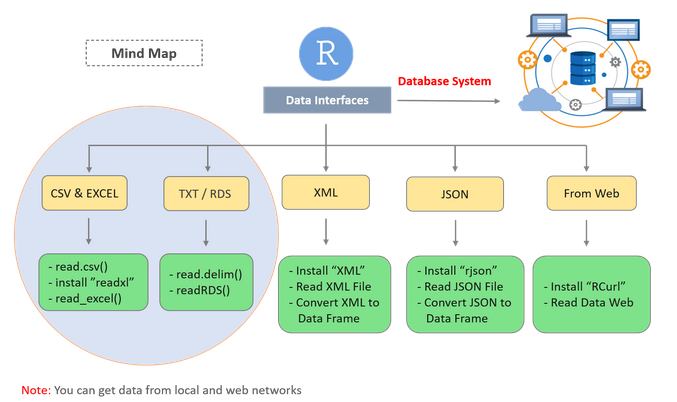

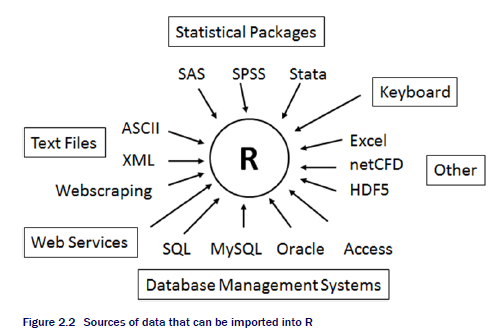

### 1 Introduction
- In R, we can read data from files stored outside the R environment. 
- We can also write data into files that will be stored and accessed by the operating system.
- R can read and write into various file formats like csv, excel, txt,rds, xml, json, etc.

### 2 Working Directory
- Before we start working with data (interface data), first make sure your working directory in the right connection. 
- You can check it by using the getwd() function. 
- You can also set a new working directory using setwd() function.

In [2]:
library("tidyverse")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [1]:
print(getwd())                                    # get and print current working directory

[1] "C:/Users/karthik/R-Programming"


In [9]:
setwd("C:/Users/karthik/R-Programming/")                 # set your working directory (this is example)
#setwd("C:\\Users\\karthik\\Desktop\\")             # or this way

In [6]:
library(help=fs)

Documentation for package 'fs'


		Information on package 'fs'

Description:

Package:              fs
Title:                Cross-Platform File System Operations Based on
                      'libuv'
Version:              1.5.2
Authors@R:            c( person("Jim", "Hester", role = "aut"),
                      person("Hadley", "Wickham", ,
                      "hadley@rstudio.com", "aut"), person("Gábor",
                      "Csárdi", , "csardi.gabor@gmail.com", role =
                      c("aut", "cre")), person("libuv project
                      contributors", role = "cph", comment = "libuv
                      library"), person("Joyent, Inc. and other Node
                      contributors", role = "cph", comment = "libuv
                      library"), person("RStudio", role = c("cph",
                      "fnd")) )
Description:          A cross-platform interface to file system
                      operations, built on top of the 'libuv' C
                      lib

In [17]:
library(fs)

In [14]:
getwd()

[1] "C:/Users/karthik/R-Programming"

In [25]:
print(dir_ls("./Data2"))

./Data2/data1.csv ./Data2/drf1.csv  


In [21]:
list.files(pattern = ".csv") #List the Files in a Directory/Folder

[1] "data1.csv"      "data2.csv"      "drf1.csv"       "drf2.csv"      
[5] "iriscopy.csv"   "moviescore.csv"

In [29]:
file.path<-fs::dir_ls()  # file.path is variable to store list of files

In [30]:
print(file.path)

Data                          Data Wrangling with R.ipynb   
data1.csv                     Data2                         
data2.csv                     DataReshape_in_R.ipynb        
drf1.csv                      drf2.csv                      
Intro-R Prog.ipynb            iriscopy.csv                  
moviescore.csv                Packages.ipynb                
R â€“ Data Interfaces.ipynb   R-op-ctrl-loop-function.ipynb 
Untitled.ipynb                untitled.r                    
untitled.txt                  


In [31]:
file_path<-list.files(path = "./Data2",pattern = ".csv")

In [39]:
seq_along(list.files(path = "./Data2",pattern = ".csv"))

[1] 1 2

In [34]:
file_content<-list()  # create empty list
for (i in seq_along(list.files(path = "./Data2",pattern = ".csv"))){
    file_content[[i]]<-readr::read_csv(file=file_path[i])
    
}
file_content

Rows: 4 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41
Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80


In [42]:
df<-data.frame()
for(i in file_content){
    print(i)
    df<-rbind(df,i)
}
df

# A tibble: 4 x 3
  Subtype Gender Expression
  <chr>   <chr>       <dbl>
1 A       m           -0.54
2 A       f           -0.8 
3 B       f           -1.03
4 C       m           -0.41
# A tibble: 2 x 3
  Subtype Gender Expression
  <chr>   <chr>       <dbl>
1 A       m           -0.54
2 A       f           -0.8 


Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41
A,m,-0.54
A,f,-0.80


In [46]:
file_path

[1] "data1.csv" "drf1.csv"

In [49]:
readf<-function(p){readr::read_csv(p)}

In [54]:
map(file_path,readf)

Rows: 4 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41
Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80


In [55]:
list.of.df<-file_path%>%purrr::map(readf)

Rows: 4 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [57]:
lapply(file_path,readf)

Rows: 4 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Subtype, Gender
dbl (1): Expression

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41
Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80


In [56]:
list.of.df

Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41
Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80


In [37]:
rbind(file_content[[1]],file_content[[1]])

Subtype,Gender,Expression
<chr>,<chr>,<dbl>
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41
A,m,-0.54
A,f,-0.80
B,f,-1.03
C,m,-0.41


In [1]:
download.file("https://github.com/svkarthik86/Advanced-python/raw/main/olympics.csv","test.csv")

### 3 Read/Write CSV
- Here is a simple example of read.csv() function to read a CSV file available in your current working directory.

In [ ]:
csv1 <-readr:: read_csv("Data/data1.csv",show_col_types = T)       # this is read data for comma separator
csv2 <- readr::read_csv("Data/data2.csv",show_col_types = FALSE)       # this is read data for semicolon separator 
head(csv1,3) 

In [ ]:
str(csv2)

In [3]:
odata<-read_csv("https://raw.githubusercontent.com/svkarthik86/Advanced-python/main/olympics.csv",skip = 4)

Rows: 29216 Columns: 10
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (9): City, Sport, Discipline, Athlete, NOC, Gender, Event, Event_gender,...
dbl (1): Edition

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
Slect the columnm

In [9]:
odata[,c('City','NOC')]   # classsic

City,NOC
<chr>,<chr>
Athens,HUN
Athens,AUT
Athens,GRE
Athens,GRE
Athens,GRE
Athens,GRE
Athens,HUN
Athens,GRE
Athens,GRE


In [35]:
#dplyr::select(odata,1:5)
#subset(odata,Edition==2008,select =1:5)%>%.[1:100,]
dplyr::filter(odata,Edition==2008)%>%.[1:100,1:5]%>%subset(.,Athlete=='HE, Chong')%>%is.na()

City,Edition,Sport,Discipline,Athlete
FALSE,FALSE,FALSE,FALSE,FALSE


In [36]:
colnames(odata)

[1] "City"         "Edition"      "Sport"        "Discipline"   "Athlete"     
 [6] "NOC"          "Gender"       "Event"        "Event_gender" "Medal"

In [91]:
#Odata who are all won the gold medal   and the year 2007 above
codata<-odata%>%filter(Medal=='Gold' & Edition>2007)#%>%select(Athlete)


In [92]:
write_csv(codata,'./Data2/codata.csv') # write data frame into local storage 

In [55]:
#is.na(odata)  # True for NA value present
na.omit(odata)

City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze


In [67]:
naV<-c(1,2,3,3,3,NA,5,NA)

In [75]:
naV[!(is.na(naV))]

[1] 1 2 3 3 3 5

In [63]:
na.omit(naV)

[1] 1 2 3 3 3 5
attr(,"na.action")
[1] 6 8
attr(,"class")
[1] "omit"

In [71]:
#na.pass(naV)
#na.exclude(naV)


In [74]:
#duplicated
#duplicated(naV) #find the duplicated value
naV[!duplicated(naV)]  # remove the duplicated value

[1]  1  2  3 NA  5

In [76]:
unique(naV)# remove duplicated value

[1]  1  2  3 NA  5

In [80]:
colnames(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [82]:
iris[!(duplicated(iris$Sepal.Length)),]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
9,4.4,2.9,1.4,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa


- R can create CSV file from existing data frame. 
- The write.csv() function is used to create the CSV file. This file gets created in the working directory.

In [ ]:
#write.csv(csv1,"Data/csv3.csv")                # check the output in your working directory
readr::write_csv(csv2,"Data/csv4.csv")

### 4 Read/Write Excel
- Microsoft Excel is the most widely used spreadsheet program which stores data in the .xls or .xlsx format. 
- R can read directly from these files using some excel specific packages. We will be using readxl package.

In [ ]:
# xlsx <- read_excel(file.choose())                # interface xlsx file without `setwd`
# install.packages("readxl")                       # install `readxl` packages 
library("readxl")                                  # load `readxl` packages
xlsx1<-read_excel("Data/xlsx1.xlsx",sheet=1)       # read/import data xlsx from PC
head(xlsx1,3)   

 - In order to write existing data frame into excel file you have to install writexl package.

In [ ]:
#install.packages("writexl")                       # install `readxl` packages 
library("writexl")                                 # load `readxl` packages 
writexl::write_xlsx(xlsx1,"Data/xlsx2.xlsx")       # check the output in your working directory

### 5 Read/Write TXT and RDS
- One of the most common tasks we perform is reading in data from CSV and XLSX files. 
- However, for large CSV or XLSX files, this can be slow. 
- One neat trick is to read in the data and save as a TXT or an R binary file (RDS). 
- To import in the TXT file, we use read.table() and to import the RDS file we can use readRDS().

In [ ]:
# txt1 <- read.table(file.choose())                # interface TXT file without `setwd`
txt1 <- read.table("Data/txt1.txt")                # read/load TXT format (notepad)
txt1 <- source("Data/txt1.Rdmpd")                  # read/load TXT format (Rdmpd)
rds1 <- readRDS("Data/rds1.rds")                   # read/load binary RDS format
ascii1 <- readRDS("Data/ascii1.rds")               # read/load binary ASCII format

- To save as a TXT file we can use “write.table()” function, and for R binary file (RDS) we can use saveRDS() function. 
- They are widely used by R itself, for example, to store metadata for a package and to store the help.
- search databases: the “.rds” file extension is most often used. 
- This format can be binary or ASCII. Binary is more compact, while ASCII will be more efficient with version control systems like Git.


In [ ]:
data <- read.csv("Data/csv1.csv",sep = ",")        # read/import data from your PC
write.table(data,"Data/txt2.txt")                  # save in a TXT format (notepad)
dump("data", "Data/txt2.Rdmpd")                    # save in a TXT format (Rdmpd)
saveRDS(data, "Data/rds2.rds")                     # save a single object in binary RDS format
saveRDS(data, "ascii2.rds", ascii=TRUE)            # save a single object in ASCII RDS format

### 6 Read/Write XML
- XML is a file format that shares both the file format and the data on the World Wide Web, intranets, and elsewhere using standard ASCII text. 
- It stands for Extensible Markup Language (XML). Similar to HTML it contains markup tags. But unlike HTML where the markup tag describes the structure of the page, in XML the markup tags describe the meaning of the data contained in the file. 
- You can read an XML file in R using the “XML” package. 
- The XML file is read by R using the function xmlParse(). It is stored as a list in R.

In [ ]:
install.packages("XML")

library("XML")                                     # load the package required to read XML files
library("methods")                                 # also load the other required package.
result <- xmlParse(file = "Data/xml1.xml")         # give the input file name to the function
print(result)   

- To handle the data effectively in large files we read the data in the XML file as a data frame. Then process the data frame for data analysis.

In [ ]:
xmldataframe <- xmlToDataFrame(result)             # convert the input xml file to a data frame
head(xmldataframe,3)                               # Print the result

In [ ]:
Create a XML file by copying this data into a text editor like notepad. Save the file with a .xml extension and choosing the file type as all files(.).

### 7 Read/Write JSON

- JSON file stores data as text in human-readable format. 
- Json stands for JavaScript Object Notation. R can read JSON files using the rjson package.

In [ ]:
library("rjson")                                   # load the package to read JSON files
json1 <- fromJSON(file= "Data/json1.json")         # give the input file name to the function
print(json1)                                       # print the result

In [2]:
subset(iris,subset = Sepal.Length>5.0,-Species)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
6,5.4,3.9,1.7,0.4
11,5.4,3.7,1.5,0.2
15,5.8,4.0,1.2,0.2
16,5.7,4.4,1.5,0.4
17,5.4,3.9,1.3,0.4
18,5.1,3.5,1.4,0.3
19,5.7,3.8,1.7,0.3
20,5.1,3.8,1.5,0.3


In [1]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [ ]:
set_names()

In [9]:
x<-list.files(pattern = ".csv")

[1] TRUE